In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from typing import Union

import PIL.Image
from ipywidgets import interact, IntSlider, Layout

from epic_kitchens.masks.io import load_detections
from epic_kitchens.masks.visualisation import DetectionRenderer

In [3]:
# Adjust these to where-ever your detections and frames are stored.

# detections_root should point to a folder with the structure
# detections_root
# |-- PXX
# |   |--- PXX_YY.pkl
detections_root = Path('../detections')

# frame_root should point tok a folder with the structure
# frames_root
# |-- PXX
# |   |-- PXX_YY
# |   |   |-- frame_zzzzzzzzzz.jpg
frames_root = Path('../frames')

In [4]:
video_id = 'P01_09'
participant_id = video_id[:3]
video_detections = load_detections(detections_root / participant_id / (video_id + '.pkl'))
max_frame_idx = len(video_detections) - 1
max_frame_idx

214269

In [5]:
class LazyFrameLoader:
    def __init__(self, path: Union[Path, str], frame_template: str = 'frame_{:010d}.jpg'):
        self.path = Path(path)
        self.frame_template = frame_template
        
    def __getitem__(self, idx: int) -> PIL.Image.Image:
        return PIL.Image.open(str(self.path / self.frame_template.format(idx + 1)))

In [9]:
frames = LazyFrameLoader(frames_root / participant_id / video_id)
renderer = DetectionRenderer(display_bbox=False)

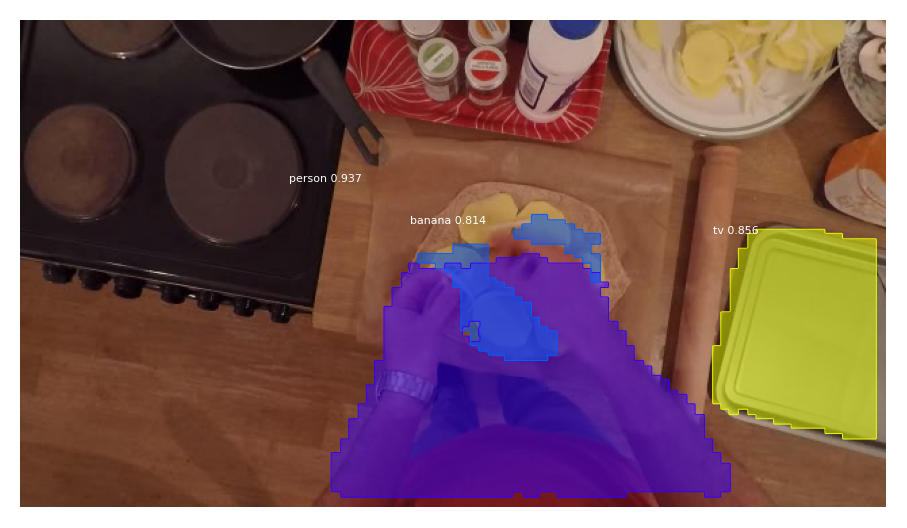

In [12]:
frame_idx = 136528
renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

In [11]:
@interact(frame_idx=IntSlider(value=10, min=0, max=max_frame_idx, layout=Layout(width='650px')))
def render_detections(frame_idx):
    return renderer.render_detections(frames[frame_idx], video_detections[frame_idx])

interactive(children=(IntSlider(value=10, description='frame_idx', layout=Layout(width='650px'), max=214269), …